# Q3

The bench hold-down clamp is being used to clamp two boards together while they are being glued as shown in Figure Q1(c). The clamp consists of a screw having single square threads of M12 X 2 and coefficient of friction in the screw thread is taken as 0.2.  The screw producing maximum power of 35 W when moving at 2mm/s axially.

 (i)   the torque acting at the screw 

(ii) the compression force exerted on the boards when torque as (i) is applied  

(iii) Recommend the suitable handle length, d if the compression force is increased to 1.5 kN, thus the user need to apply force of 100 N on the handle. 

In [54]:
# Required
from math import sin, cos, tan, pi, atan, asin, degrees, radians
from matplotlib import pyplot as plt
import numpy as np

In [55]:
# Dimensions in m
screw_type = 1 # single-start
alpha = 0
alpha_n = 0
d_outer = 0.012
d_collar = 0
pitch = 0.002
f_screw = 0.2
f_collar = 0
screw_power = 35
v_linear = 2
print('Power Screw Type: Square thread')

Power Screw Type: Square thread


(i)   the torque acting at the screw

Power is given, we can find the torque using

$$P=\omega T$$
$$P=\frac {2\pi n_{rpm}}{60} T$$

Find $n_{rpm}$ using screw Linear Velocity

$$v_{screw}=Lead\times \frac{n_{rpm}}{60}$$

In [56]:
Lead = screw_type*pitch
print(f'Lead={Lead*1000}mm/turn')

Lead=2.0mm/turn


$$2=2\times \frac{n_{rpm}}{60}$$

In [57]:
n_rpm = 60
print(f'n_rpm={n_rpm}rpm')

n_rpm=60rpm


$$35=\frac {2\pi (60)}{60} T$$

In [58]:
Torque = screw_power*60/(2*pi*n_rpm)
print(f'Torque, T = {Torque:.3f}Nm')

Torque, T = 5.570Nm


(ii) the compression force exerted on the boards when torque as (i) is applied

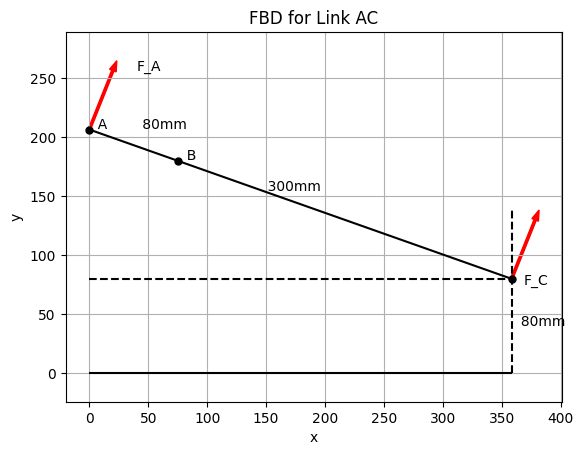

In [59]:
# FBD for Link AC

coorA = [0,206.66]
coorB = [75.425,180]
coorC = [358.27,80]

data = np.array([coorA,coorB,coorC])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
# ax.scatter(x,y, color='k')
ax.plot(x,y, color='k', marker='o', markersize=5)
ax.arrow(coorA[0],coorA[1], 20,50,width=2,color='r')
ax.arrow(coorC[0],coorC[1], 20,50,width=2,color='r')
ax.vlines(coorC[0],0,140, color='k', linestyles='dashed')
ax.hlines(0,0,358.27, color='k')
ax.hlines(80,0,358.27, color='k', linestyles='dashed')

ax.set(xlabel='x', ylabel='y',
       title='FBD for Link AC')

ax.text(coorA[0]+40,coorA[1]+50,f'F_A')
ax.text(coorC[0]+10,coorC[1]-5,f'F_C')
ax.text(coorA[0],coorA[1]+1,f'  A        80mm')
ax.text(coorB[0],coorB[1]+1,f'  B ')
ax.text(coorB[0]+20,coorB[1]-25,f'               300mm')
ax.text(coorC[0],coorC[1]-40,f'  80mm')

plt.axis('equal')
plt.show()

Free body diagram

$$+\circlearrowleft \sum M_B=0$$
$$-F_A(80)+F_C(300)=0$$

Find force at power screw to find $F_c$
Force at power screw is load, W

$$T_u = \frac{Wd_m}{2} \frac{f+\cos\alpha_n \tan\lambda}{\cos\alpha_n + f\tan\lambda} + \frac{Wf_c d_c}{2}$$

No collar friction and square thread is used

$f_c = 0$ and $\alpha=0 , \alpha_n=0$

$$T_u = \frac{Wd_m}{2} \frac{f+\cos(0) \tan\lambda}{\cos(0) + f\tan\lambda}$$

Find mean diameter, $d_m = \frac {D+(D-p)}{2}$

$d_m = \frac {12+(12-2)}{2}$

In [60]:
d_inner = d_outer-pitch
d_mean = (d_outer+d_inner)/2

print(f'Mean diameter={d_mean}m')
print(f'Inner diameter={d_inner}m')

Mean diameter=0.011m
Inner diameter=0.01m


From equation
$$ \tan\lambda = \frac{L}{\pi d_m} $$

In [61]:
tan_lambda = Lead/(pi*d_mean)
print(f'tan(lambda)={tan_lambda}')
lambda_helix = degrees(atan(tan_lambda))
print(f'Lambda = {lambda_helix}')

tan(lambda)=0.057874524760689224
Lambda = 3.312271200129051


$$5.57 = \frac{F_A (0.011)}{2} \frac{(0.2)+\cos(0) \tan\lambda}{\cos(0) - (0.2)\tan\lambda}$$

In [62]:
F_a = 2*(cos(radians(alpha_n))-(f_screw*tan(radians(lambda_helix))))*Torque/(d_mean*(f_screw+(cos(radians(alpha_n))*tan(radians(lambda_helix)))))
print(f'F_a={F_a:.3f}N')

F_a=3882.047N


From
$$-F_A(80)+F_C(300)=0$$
$$-(3882)(80)+F_C(300)=0$$

In [63]:
F_c = round(F_a*80/300,2)
print(f'F_c = {F_c} N')

F_c = 1035.21 N


In [64]:
theta = round(degrees(asin(100/300)),2)
print(f'theta={theta}')

theta=19.47


In [65]:
F_cy=round(F_c*cos(radians(theta)),2)
print(f'F_cy={F_cy:.2f}N')

F_cy=976.01N


(iii) Recommend the suitable handle length, d if the compression force is increased to 1.5 kN, thus the user need to apply force of 100 N on the handle. 

In [71]:
F_cy_new = 1500
F_c_new = round(F_cy_new/cos(radians(theta)),0)
print(f'New perpendicular force at C, Fc={F_c_new:.1f}N')

New perpendicular force at C, Fc=1591.0N


From
$$-F_A(80)+F_C(300)=0$$
$$-F_A(80)+(1414.21)(300)=0$$

In [73]:
F_a=F_c_new*300/80
print(f'New  force at A, Fa={F_a:.2f}N')

New  force at A, Fa=5966.25N


In [74]:
T_u_new =(F_a*d_mean/2)*((f_screw+(cos(radians(alpha_n))*tan(radians(lambda_helix))))/(cos(radians(alpha_n))-(f_screw*tan(radians(lambda_helix)))))+(F_a*f_collar*d_collar/2)
print(f'T_u={T_u_new:.2f}N')

T_u=8.56N


Torque equation
$$T_u = r \times F_a$$
$$8.56 = r \times 5966.25$$
$$d=2\times r$$

In [77]:
d_forLever = round(2*T_u_new/100,3)
print(f'Lever length, d={d_forLever}m')

Lever length, d=0.171m
